In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

import seaborn as sb
import matplotlib.pyplot as plt

import datetime

guns = pd.read_csv('C:\Users\Sim Keng Ying\Desktop\gun-violence-data\gun-violence-data_01-2013_03-2018.csv')

In [ ]:
np.random.seed(0)

In [5]:
guns.head(5)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [6]:
missing_values_count = guns.isnull().sum()
missing_values_count

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

In [7]:
total_cells = np.product(guns.shape)
total_missing = missing_values_count.sum()
total_missing

1263226

In [11]:
guns_with_na_dropped = guns.dropna(axis=1)
guns_with_na_dropped.head(5)

,incident_id,date,state,city_or_county,n_killed,n_injured,incident_url,incident_url_fields_missing
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,http://www.gunviolencearchive.org/incident/461105,False
1,460726,2013-01-01,California,Hawthorne,1,3,http://www.gunviolencearchive.org/incident/460726,False
2,478855,2013-01-01,Ohio,Lorain,1,3,http://www.gunviolencearchive.org/incident/478855,False
3,478925,2013-01-05,Colorado,Aurora,4,0,http://www.gunviolencearchive.org/incident/478925,False
4,478959,2013-01-07,North Carolina,Greensboro,2,2,http://www.gunviolencearchive.org/incident/478959,False


In [12]:
print("Columns in original dataset: %d \n" % guns.shape[1])
print("Columns with na's dropped: %d" % guns_with_na_dropped.shape[1])

Columns in original dataset: 29 

Columns with na's dropped: 8


C:\Users\Sim Keng Ying\Documents\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sim Keng Ying\Documents\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


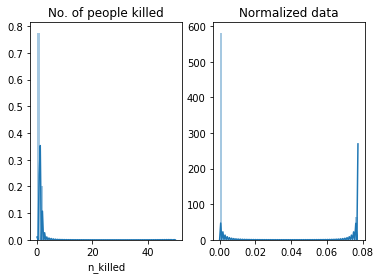

In [18]:
guns_new = guns_with_na_dropped
people_killed =  guns_new.n_killed

index_of_people_killed = guns_new.n_killed > 0
people_killed2 = guns_new.n_killed.loc[index_of_people_killed]

normalized_killed = stats.boxcox(people_killed2)[0]

fig, ax=plt.subplots(1,2)
sb.distplot(people_killed, ax=ax[0])
ax[0].set_title("No. of people killed")
sb.distplot(normalized_killed, ax=ax[1])
ax[1].set_title("Normalized data")

people_killed = normalized_killed


In [20]:
guns_new['date'].dtype

dtype('O')

In [25]:
pd.options.mode.chained_assignment = None
guns_new['date'] = pd.to_datetime(guns_new['date'], format = "%Y-%m-%d")
guns_new['date'].head()

0   2013-01-01
1   2013-01-01
2   2013-01-01
3   2013-01-05
4   2013-01-07
Name: date, dtype: datetime64[ns]

C:\Users\Sim Keng Ying\Documents\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


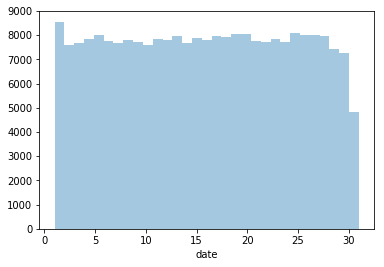

In [27]:
guns_day = guns_new['date'].dt.day
sb.distplot(guns_day, kde=False, bins=31)

In [30]:
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from pylab import rcParams

In [31]:
%matplotlib inline
rcParams['figure.figsize'] = 6,5
sb.set_style('whitegrid')